In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [5]:
indataset=pd.read_csv("/content/insurance.csv")

In [6]:
indataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
indataset.shape

(1338, 7)

In [8]:
indataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
indataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
indataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


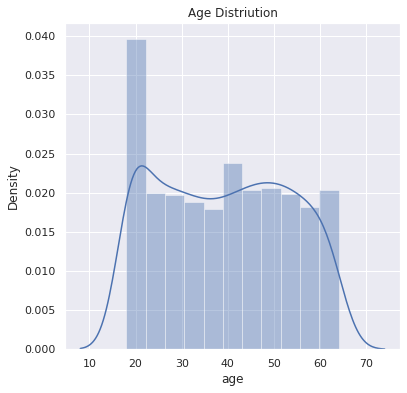

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(indataset['age'])
plt.title("Age Distriution")
plt.show()

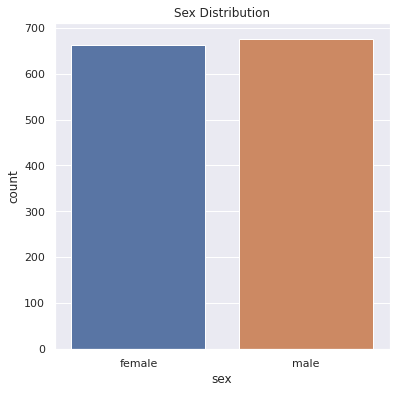

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=indataset)
plt.title("Sex Distribution")
plt.show()

In [14]:
indataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


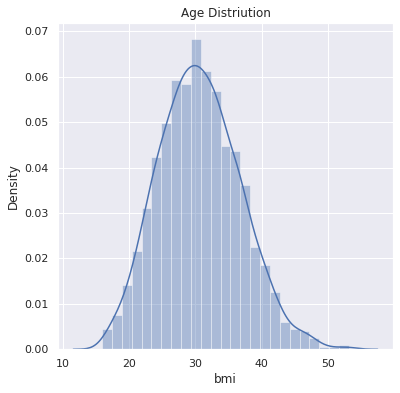

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(indataset['bmi'])
plt.title("Age Distriution")
plt.show()

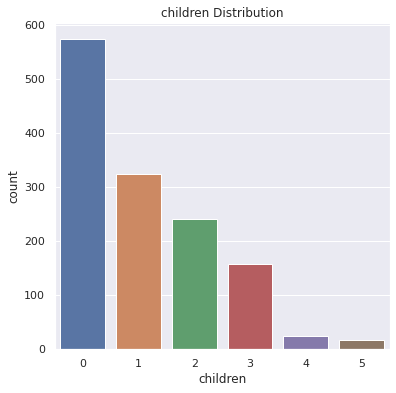

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=indataset)
plt.title("children Distribution")
plt.show()

In [17]:
indataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

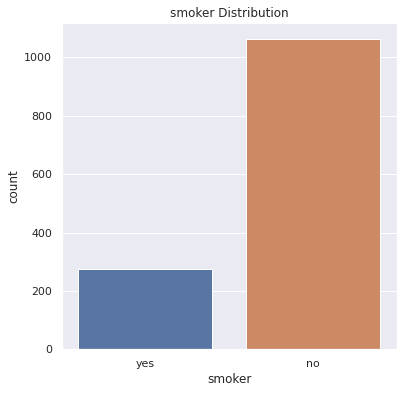

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=indataset)
plt.title("smoker Distribution")
plt.show()

In [20]:
indataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

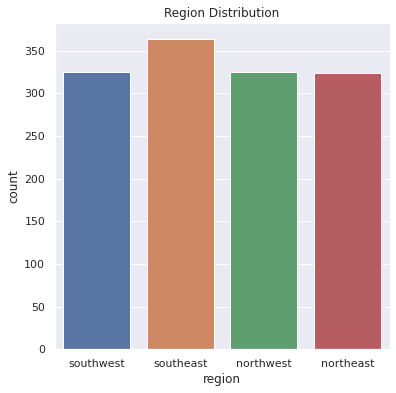

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=indataset)
plt.title("Region Distribution")
plt.show()

In [22]:
indataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


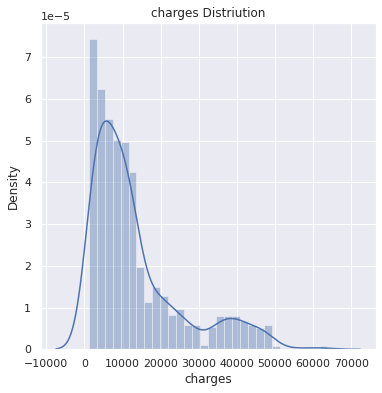

In [23]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(indataset['charges'])
plt.title("charges Distriution")
plt.show()

In [24]:
indataset.replace({'sex':{'male':0,'female':1}},inplace=True)
indataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
indataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':1}},inplace=True)

In [25]:
indataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520


In [26]:
X=indataset.drop(columns='charges',axis=1)
Y=indataset['charges']

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [29]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [32]:
trainingdataprediction=regressor.predict(X_train)
r2_train=metrics.r2_score(Y_train,trainingdataprediction)
print("R2 Squarred Value",r2_train)

R2 Squarred Value 0.7516224338234802


In [33]:
testdataprediction=regressor.predict(X_test)
r2_test=metrics.r2_score(Y_test,testdataprediction)
print("R2 Squarred Value",r2_test)

R2 Squarred Value 0.744953504113289


In [37]:
inputdata=(62,1,26.29,0,0,0)
inputdatasetarray=np.asarray(inputdata)
inputdatareshape=inputdatasetarray.reshape(1,-1)
prediction=regressor.predict(inputdatareshape)
print(prediction)

[35585.90711108]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
print("The insurance cost prediction in USD",prediction[0])

The insurance cost prediction in USD 35585.907111075016
